In [1]:
# An implementation of wild mosaic theory into SageMath.

class Tile():
    def __init__(self,N):
        self.tile = N
        self.orientation = []
        if (N == 0):
            self.numConnectionPoints = 0
            self.connectionDirections = []
        if (N in [1,2,3,4,5,6]):
            self.numConnectionPoints = 2
            if (N==1):
                self.connectionDirections = ['left','down']
            if (N==2):
                self.connectionDirections = ['right','down']
            if (N==3):
                self.connectionDirections = ['up','right']
            if (N==4):
                self.connectionDirections = ['left','up']
            if (N==5):
                self.connectionDirections = ['left','right']
            if (N==6):
                self.connectionDirections = ['up','down']
        if (N in [7,8,9,10]):
            self.numConnectionPoints = 4
            self.connectionDirections = ['up','down','left','right']
    def show(self, resolution = 5):
        if (self.tile==0):
            return line([(0,0),(1,0)], axes = False, xmin = 0, xmax = 1, ymin = 0, ymax = 1, frame = True, ticks=[[],[]], thickness=0).plot()
        if (self.tile==1):
            return arc((0,0), 1, sector=(0,pi/2), axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==2):
            return arc((0,0), 1, sector=(0,pi), axes = False, xmin = -2, xmax = 0, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==3):
            return arc((0,0), 1, sector=(pi,2*pi), axes = False, xmin = -2, xmax = 0, ymin = -2, ymax = 0, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==4):
            return arc((0,0), 1, sector=(pi,2*pi), axes = False, xmin = 0, xmax = 2, ymin = -2, ymax = 0, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==5):
            return line([(0,1), (1,1)], axes = False, xmin = 0, xmax = 1, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==6):
            return line([(1,0), (1,1)], axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 1, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==7):
            return arc((0,0), 1, sector=(0,pi/2), axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot() + arc((2,2), 1, sector=(pi,2*pi), axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==8):
            return arc((0,2), 1, sector=(2*pi/3,2*pi), axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot() + arc((2,0), 1, sector=(pi,pi/2), axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==9):
            return line([(0,1), (2,1)], axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot() + line([(1,0), (1,.6)], axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot() + line([(1,1.4), (1,2)], axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot()
        if (self.tile==10):
            return line([(1,2), (1,0)], axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot() + line([(0,1), (.6,1)], axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot() + line([(1.4,1), (2,1)], axes = False, xmin = 0, xmax = 2, ymin = 0, ymax = 2, frame = True, ticks=[[],[]], thickness=resolution).plot()
    def isGoing(self, direction):
        # e.g. Tile(6).isGoing('up') returns True but Tile(6).isGoing('left') returns False
        # This is good for checking suitable connectivity later
        return direction in self.connectionDirections
    def zoom(self):
        # Every tile becomes 3x3 matrix
        # TODO: Later, iterate this with an input "amount"
        N = self.tile
        if (N==0):
            return [[0,0,0],[0,0,0],[0,0,0]]
        if (N==1):
            return [[0,0,0],[5,1,0],[0,6,0]]
        if (N==2):
            return [[0,0,0],[0,2,5],[0,6,0]]
        if (N==3):
            return [[0,6,0],[0,3,5],[0,0,0]]
        if (N==4):
            return [[0,6,0],[5,4,0],[0,0,0]]
        if (N==5):
            return [[0,0,0],[5,5,5],[0,0,0]]
        if (N==6):
            return [[0,6,0],[0,6,0],[0,6,0]]
        if (N==7):
            return [[0,3,1],[1,0,3],[3,1,0]]
        if (N==8):
            return [[2,4,0],[4,0,2],[0,2,4]]
        if (N==9):
            return [[0,6,0],[5,9,5],[0,6,0]]
        if (N==10):
            return [[0,6,0],[5,10,5],[0,6,0]]
    def orient(self, direction):
        # Assigns an orientation to a tile
        assert direction in self.connectionDirections #returns error if orientation not possible
        self.orientation = self.orientation + [direction]

class Mosaic():
    def __init__(self,mosaic_matrix): #Takes input matrix or list of lists (array)
        self.matrixRepresentation = matrix(mosaic_matrix)
        self.size = len(self.matrixRepresentation.rows())
        #attributes/properties of object go here
    def __repr__(self):
        # This representation is announced upon construction. Comment out later, here for testing.
        return f"Mosaic of dimension {self.size}."
    def show(self, resolution = 5):
        # Letting W = Mosaic(M) for a matrix M then running W.show() outputs a graphic for the mosaic
        return graphics_array([[x.show() for x in row] for row in [list(map(Tile,row)) for row in [list(x) for x in self.matrixRepresentation]]]).show(figsize=[resolution, resolution])
    def matrix(self):
        # Letting W = Mosaic(M) for a matrix M, and doing W.matrix() returns the matrix representation of the mosaic
        return self.matrixRepresentation
    def directions(self,i,j):
        # Letting W = Mosaic(M) for a matrix M, doing W.directions(i,j) returns the connection points
        # of the (i,j)th tile, where (0,0) is the tile in the upper-left (matrix notation, indexed at 0)
        M = self.matrixRepresentation
        directions = Tile(M[i][j]).connectionDirections
        return directions
    def isSuitablyConnected(self):
        # As above, for W = Mosaic(M), doing W.isSuitablyConnected() returns either True/False based on connectivity
        M = self.matrixRepresentation
        for i in range(self.size):
            for j in range(self.size):
                if Tile(M[i][j]).isGoing('up'):
                    if i == 0:
                        return False
                    elif not Tile(M[i-1][j]).isGoing('down'):
                        return False
                if Tile(M[i][j]).isGoing('left'):
                    if j == 0:
                        return False
                    elif not Tile(M[i][j-1]).isGoing('right'):
                        return False
                if Tile(M[i][j]).isGoing('right'):
                    if j == self.size-1:
                        return False
                    elif not Tile(M[i][j+1]).isGoing('left'):
                        return False
                if Tile(M[i][j]).isGoing('down'):
                    if i == self.size-1:
                        return False
                    elif not Tile(M[i+1][j]).isGoing('up'):
                        return False
        return True
    def zoom(self):
        # Zooms by 3x, replaces each tile by a 3x3 isotopy equivalent tile
        # Usage is W.zoom() fro W = Mosaic(M)
        M = self.matrixRepresentation
        M_tensored = [[Tile(x).zoom() for x in row] for row in [list(x) for x in list(M)]]
        A = [] # The below code unwraps inner 3x3 subtiles
        for n in range(len(M_tensored)*3):
            A = A + [[x[n%3] for x in M_tensored[floor(n/3)]]] #Euclidean division, n = floor(n/3)*3 + n%3
        B = [] # The below code unwraps inner 1x3 subtiles
        for row in A:
            tupe = []
            for tuple in row:
                tupe = tupe + tuple
            B = B + [tupe]
        return Mosaic(B)
    def findCrossings(self):
        # Returns a list of the coordinates (i,j) in the matrix of crossings, i.e. 9/10 tiles
        M = self.matrixRepresentation
        n = self.size
        M_rows = [list(x) for x in M.rows()]
        crossing_coord = []
        for i in range(n):
            row_crossings = [j for j, x in enumerate(M_rows[i]) if x == 9 or x == 10]
            crossing_coord += [(i,j) for j in row_crossings]
        return crossing_coord
    def numCrossings(self):
        return len(self.findCrossings())
        
    def shift(self,i,j, dictionary = False):
        # Setting 'dictionary = True' allows a dictionary return of tile directions
        assert self.isSuitablyConnected() == True # prevents indexing issues
        M = self.matrixRepresentation
        directions = Tile(M[i][j]).connectionDirections
        directions_dict = dict()
        
        if 'up' in directions:
            directions_dict['up'] = (i-1,j)
        if 'down' in directions:
            directions_dict['down'] = (i+1,j)
        if 'left' in directions:
            directions_dict['left'] = (i,j-1)
        if 'right' in directions:
            directions_dict['right'] = (i,j+1)

        if dictionary == True:
            return directions_dict
        else:
            return list(directions_dict.values())
        
    
    def walk(self, crossing, direction, pathList = False, tangent = False):
        #assert #NEED TO ENSURE NO HYPERBOLIC TILES
        # Given a crossing and direction (up/down/left/right), returns crossing reached and orientation demanded
        # W.walk(W.walk(crossing, direction)[0],W.walk(crossing, direction)[1]) #is actually just the identity, returns crossing, direction, as expected
        all_crossings = self.findCrossings() # list of crossings (i,j)
        assert crossing in all_crossings # error prevention
        M = self.matrixRepresentation
        (pos_x, pos_y) = crossing # CAREFUL: pos_x, pos_y are row, col -- not Cartesian coords!
        (prev_x, prev_y) = crossing
        # Start at the indicated crossing tile (i,j), goes direction
        
        if direction == 'up':
            pos_x -= 1
        if direction == 'down':
            pos_x += 1
        if direction == 'left':
            pos_y -= 1
        if direction == 'right':
            pos_y += 1

        path = [(prev_x, prev_y), (pos_x, pos_y)]
        # Continue walking until reaching another crossing
        while len(Tile(M[pos_x][pos_y]).connectionDirections) == 2: # If it's a two way street, keep going
            accessible_coords = self.shift(pos_x,pos_y)
            accessible_coords.remove((prev_x, prev_y)) # only one possibility after this
            (prev_x, prev_y) = (pos_x, pos_y)
            (pos_x, pos_y) = accessible_coords[0]
            path += [(pos_x, pos_y)]

        if prev_x < pos_x: # i.e. entered from higher tile
            incidence = 'up'
        if prev_x > pos_x:
            incidence = 'down'
        if prev_y < pos_y:
            incidence = 'left'
        if prev_y > pos_y:
            incidence = 'right'
        
        if pathList == True:
            return path
        elif tangent == True:
            return (pos_x, pos_y), opposite(incidence)
        else:
            return (pos_x, pos_y), incidence
    def arcList(self):
        # run walk on each crossing and with condition pathList = True
        # remove duplicates in nice manner
        pass
            
        # TODO: create graph based on crossing! each vertex should have degree 4, i.e. 4-regular!
        # This is a singular knot representation, nearly, but orientations indicate knot
        # Perhaps for  fun output a directed graph of this sort for visualization.

    def strandOf(self, crossing, direction = 'up'):
        # Returns strand of a single provided crossing.
        # Orientation at crossign defaults to 'up' unless otherwise indicated.
        crossings = self.findCrossings()
        assert crossing in crossings
        
        initial = crossing
        initial_direction = direction
        strandPath = self.walk(initial, direction, pathList = True)
        position, direction = self.walk(initial, direction, tangent = True)

        while position != initial: 
            strandPath += self.walk(position, direction, pathList = True)[1:] # Drops off repeated start (time = 0)
            position, direction = self.walk(position, direction, tangent = True)
            if position == initial:  # This prevent stopping the while loop if initial crossing approached orthogonally
                if strandPath[-2] != self.shift(initial[0],initial[1],dictionary = True)[opposite(initial_direction)]:
                    strandPath += self.walk(position, direction, pathList = True)[1:]
                    position, direction = self.walk(position, direction, tangent = True)
                else:
                    return strandPath[:-1] # Used to remove duplicate starting/ending position

    def localFrames(self):
        # Returns the tile above/below (as a pair) each crossing in the mosaic
        return [(self.shift(crossing[0],crossing[1],True)['up'], self.shift(crossing[0],crossing[1],True)['right']) for crossing in self.findCrossings()] 
    
    def strands(self):
        # Returns all strands (applies only when multiple connected components).
        crossings = self.findCrossings() #every crossing should visited twice...
        
        
        pass #TOOD.
        
        # check missed crossings after... for x in all_crossings, if x not in strand_list... add to list corresp. to new knot
        # WARNING: does this tell you when two knots are linked? what does this do for hopf?
        # Perhaps could be used primarily for orienting, i.e. Sage Links compatibility

    def planarDiagramCode(self):
        #TODO: This output is what's needed for compatibility with Links package in Sage
        # https://doc.sagemath.org/html/en/reference/knots/sage/knots/link.html
        pass
        
def random_mosaic(dimension):
    # This code is embarassing, but if it's stupid and it works it's not stupid.
    # Good luck ever getting this to work for high dimension! Technically, you need luck. Like, a lot of it.
    connect_check = False
    while connect_check == False:
        M = Mosaic(random_matrix(GF(11),dimension,dimension))
        connect_check = M.isSuitablyConnected()
    return M

def opposite(direction):
    assert direction in ['up','down','left','right']
    if direction == 'up':
        return 'down'
    if direction == 'down':
        return 'up'
    if direction == 'left':
        return 'right'
    if direction == 'right':
        return 'left'

#class mosaics():
#    def __init__(self):
        # Refer to graphs Sage package...
        # https://www.geneseo.edu/knotmosaics/knot-table
        # https://github.com/andrew-tawfeek/knot-mosaics/blob/master/README.md
        # https://github.com/amheap/knot-mosaics/blob/master/pythonFiles/draw_knots.py

###############################

        
# Example code:
# M = matrix([[0,2,1,0,0],[2,9,10,1,0],[3,10,9,10,1],[0,3,7,8,4],[0,0,3,4,0]]); W = Mosaic(M);
# W.matrix() 
# W.show()
# W.isSuitablyConnected()

# W = Mosaic(M).zoom()
# W.walk((4,7), 'right', pathList = True) # Putting 'True' provides the pathing

# hopf = Mosaic([[0,2,1,0],[2,9,10,1],[3,10,10,4],[0,3,4,0]]); hopfBig = hopf.zoom(); hopfBig.show(10)
# hopfBig.strandOf((4,4),'up')
# hopfBig.strandOf((4,4),'left')
# These are two different strands (knots) in the hopf! Going left/going right at the crossing determines what was taken.

#hopfBig.shift(3,4, dictionary = True) # Returns directions of tiles *connected too*

# W = Mosaic([(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),(0, 0, 0, 0, 2, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0),(0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0),(0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0),(0, 2, 5, 5, 9, 5, 5, 10, 5, 5, 1, 0, 0, 0, 0),(0, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0),(0, 6, 0, 0, 6, 0, 0, 3, 1, 0, 6, 0, 0, 0, 0),(0, 3, 5, 5, 10, 5, 1, 0, 3, 5, 10, 5, 5, 1, 0),(0, 0, 0, 0, 6, 0, 3, 1, 0, 0, 6, 0, 0, 6, 0),(0, 0, 0, 0, 6, 0, 0, 6, 0, 2, 4, 0, 0, 6, 0),(0, 0, 0, 0, 3, 5, 5, 10, 5, 4, 0, 2, 5, 4, 0),(0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 2, 4, 0, 0, 0),(0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0),(0, 0, 0, 0, 0, 0, 0, 3, 5, 5, 4, 0, 0, 0, 0),(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)])
# W.strandOf((4,4), direction = 'right').count((4,4)) == 2
# This indicates the crossing was visited twice in the walk. Orthogonality check is done in the code during second pass-through.

In [2]:
M = matrix([[0,2,1,0,0],[2,9,10,1,0],[3,10,9,10,1],[0,3,7,8,4],[0,0,3,4,0]]); W = Mosaic(M);

In [3]:
W.matrix() 

[ 0  2  1  0  0]
[ 2  9 10  1  0]
[ 3 10  9 10  1]
[ 0  3  7  8  4]
[ 0  0  3  4  0]

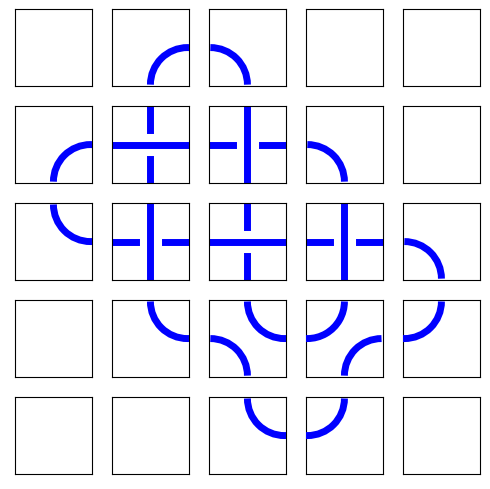

In [4]:
W.show()

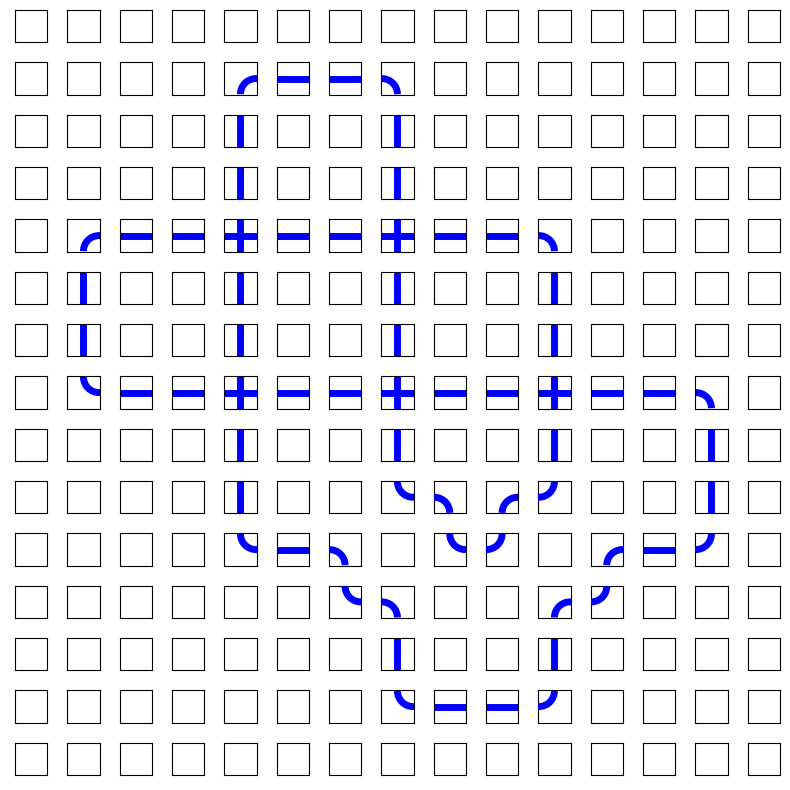

[(4, 7), (4, 8), (4, 9), (4, 10), (5, 10), (6, 10), (7, 10)]

In [7]:
W = Mosaic(M).zoom(); W.show(8)
W.walk((4,7), 'right', pathList = True) # Putting 'True' provides the pathing

In [8]:
W.strandOf((4,4), direction = 'right')

[(4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 10),
 (6, 10),
 (7, 10),
 (8, 10),
 (9, 10),
 (9, 9),
 (10, 9),
 (10, 8),
 (9, 8),
 (9, 7),
 (8, 7),
 (7, 7),
 (6, 7),
 (5, 7),
 (4, 7),
 (3, 7),
 (2, 7),
 (1, 7),
 (1, 6),
 (1, 5),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 4),
 (9, 4),
 (10, 4),
 (10, 5),
 (10, 6),
 (11, 6),
 (11, 7),
 (12, 7),
 (13, 7),
 (13, 8),
 (13, 9),
 (13, 10),
 (12, 10),
 (11, 10),
 (11, 11),
 (10, 11),
 (10, 12),
 (10, 13),
 (9, 13),
 (8, 13),
 (7, 13),
 (7, 12),
 (7, 11),
 (7, 10),
 (7, 9),
 (7, 8),
 (7, 7),
 (7, 6),
 (7, 5),
 (7, 4),
 (7, 3),
 (7, 2),
 (7, 1),
 (6, 1),
 (5, 1),
 (4, 1),
 (4, 2),
 (4, 3)]